In [1]:
# imports
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import random
from sklearn.preprocessing import StandardScaler
from sklearn.manifold import TSNE

In [2]:
# Load File
data = np.load('mnist_small.pkl',encoding='bytes',allow_pickle=True)
train_x = data['X']
train_y = data['Y']
print(train_y)

[[0]
 [0]
 [0]
 ...
 [9]
 [9]
 [9]]


In [3]:
# Doing PCA on X
scaler = StandardScaler()

# Standardizing Data
train_x_standardized = scaler.fit_transform(train_x)

# Finding Eigen Values
cov_matrix = np.cov(train_x_standardized.T)
eigenvalues, eigenvectors = np.linalg.eig(cov_matrix)

# Computing top k eigen vectors
sorted_indices = np.argsort(eigenvalues)[::-1]
sorted_eigenvalues = eigenvalues[sorted_indices]
sorted_eigenvectors = eigenvectors[:, sorted_indices]
top_eigenvectors = sorted_eigenvectors[:, :2]

# Dimension Reduction on input train_x using dimension reduction
train_x_pce = np.dot(train_x_standardized, top_eigenvectors)
print(type(train_x_pce))

<class 'numpy.ndarray'>


No artists with labels found to put in legend.  Note that artists whose label start with an underscore are ignored when legend() is called with no argument.


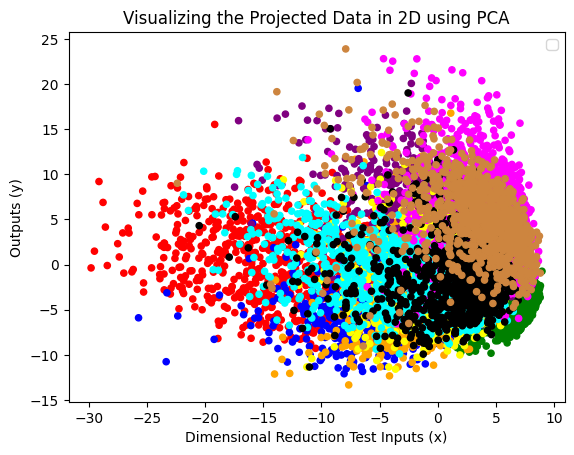

In [4]:
# Visualizing PCA
colors = {0: 'red', 1: 'green', 2: 'blue', 3: 'orange', 4: 'purple', 5: 'yellow', 6: 'cyan', 7: 'magenta', 8: 'black', 9: 'peru'}
temp = pd.DataFrame(data=train_y,columns=['y'])
plt.scatter(train_x_pce[:, 0], train_x_pce[:, 1], c=temp['y'].map(colors), marker='o',s=20)
plt.xlabel('Dimensional Reduction Test Inputs (x)')
plt.ylabel('Outputs (y)')
plt.title('Visualizing the Projected Data in 2D using PCA')
plt.legend()
plt.show()

In [5]:
# Doing tSne on X
tsne = TSNE(n_components=2, random_state=42)

# Fit and transform the data
train_x_tsne = tsne.fit_transform(train_x)

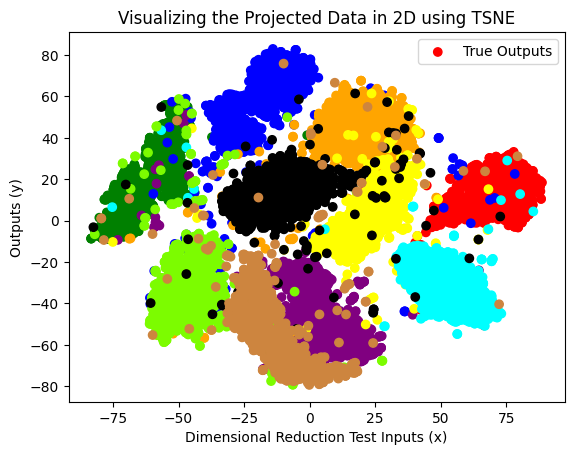

In [ ]:
# Visualizing PCA
colors = {0: 'red', 1: 'green', 2: 'blue', 3: 'orange', 4: 'purple', 5: 'yellow', 6: 'cyan', 7: 'lawngreen', 8: 'black', 9: 'peru'}
temp = pd.DataFrame(data=train_y,columns=['y'])
plt.scatter(train_x_tsne[:, 0], train_x_tsne[:, 1], c=temp['y'].map(colors), label='True Outputs', marker='o')
plt.xlabel('Dimensional Reduction Test Inputs (x)')
plt.ylabel('Outputs (y)')
plt.title('Visualizing the Projected Data in 2D using TSNE')
plt.legend()
plt.show()